# MAE Optimization LAB 3

## April 2022

<div class="alert alert-danger">
Caution: execute the cells sequentially 
<div>

div class="alert alert-block alert-warning">  Student Name:
    
    - First Name, Last Name:
    
    - First Name, Last Name:

# Lab3 - Conic intersection
 
The movement of network spatial objects follows conical trajectories in the movement plane $\mathbb{R}^2$. Thus, for there to be a collision between two spatial objects, their trajectories must intersect and arrive synchronously at their intersection points. 

In this computer lab, we will be interested in analyzing an optimization problem related to conic intersection. Namely, the main goal will be to estimate the intersection points of the two following conics:
\begin{eqnarray}
 -x^2+xy+y^2+3 &=& 0\qquad (\mathcal{C}_1)\nonumber\\
x^2+xy+y^2-3 &=& 0\qquad (\mathcal{C}_2)\nonumber
\end{eqnarray}

Three possible approaches will be explored: 

- **Approach I** is an analytical approach where we will compute explicity the intersection points.
- **Approach II** is an unconstrained optimization based approach to find the intersection points by minimizing an objective function $x \to f(x)$ over $\mathbb{R}^2$.
- **Approach III** is a constrained optimization based approach where we minimize the distance between two points $A$ and $B$ in the plane $\mathbb{R}^2$ such that $A \in \mathcal{C}_1$ and $B \in \mathcal{C}_2$.

<p class="bg-primary" style="padding:1em"> **Question 1):** Following the analytical approach, compute the intersection points between the conics $\mathcal{C}_1$ and $\mathcal{C}_2$. </p> 

<div class="alert alert-block alert-warning"> Solution: 
(sqrt(3),0)  (sqrt(3),-sqrt(3))  (-sqrt(3),0)  (-sqrt(3),sqrt(3))  

</div> 

### Imports:

In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib as mpl
import matplotlib.pyplot as plt

## Plot  the two conics to check the intersection points

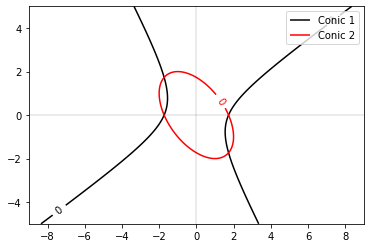

In [2]:

mpl.rcParams['lines.color'] = 'k'
mpl.rcParams['axes.prop_cycle'] = mpl.cycler('color', ['k'])
x = np.linspace(-9, 9, 400)
y = np.linspace(-5, 5, 400)
x, y = np.meshgrid(x, y)
def axes():
    plt.axhline(0, alpha=.1)
    plt.axvline(0, alpha=.1)
    
a = .3
axes()
CS= plt.contour(x, y, -x**2+x*y+y**2+3. , [0], colors='k')
CS2= plt.contour(x, y, x**2+x*y+y**2-3. , [0], colors='r')
plt.clabel(CS, inline=1, fontsize=10)
CS.collections[0].set_label('Conic 1')
plt.clabel(CS2, inline=1, fontsize=10)
CS2.collections[0].set_label('Conic 2')    
plt.legend()

plt.show()


<p class="bg-primary" style="padding:1em"> **Question 2):** Following the second approach, give a possible expression of the objective function $f$, compute its gradient. Complete the Python implementation of the following functions. </p> 

<div class="alert alert-block alert-warning"> Solution: 
  

</div>   

In [41]:
def obj_func_approach_II(x) : 
    #TO DO (Complete the code objective function code)
    x1 = x[0]
    x2 = x[1]
    obj_f_x= (-x1**2 + x1*x2 + x2**2 + 3)**2 + (x1**2 + x1*x2 + x2**2 - 3)**2                 # complete this code line
    return (obj_f_x)
def grad_obj_func_approach_II(x) : 
     #TO DO (Complete the code of the grad of the obj function)
    x1 = x[0]
    x2 = x[1]
    a= 2*(-x1**2 + x1*x2 + x2**2 + 3)*(-2*x1+x2) + 2*(x1**2 + x1*x2 + x2**2 - 3)*(2*x1+x2)          # complete this code line
    b= 2*(x1+2*x2)*(2*x1*x2+x2**2)                               # complete this code line
    grad_obj_x=np.array([a,b])
    return (grad_obj_x)

<p class="bg-primary" style="padding:1em"> **Question 3):** Use the Python module "opt.fmin_bfgs", Solve the optimization problems related to **Approach II** $\min_{{\mathbb R}^2} f(x)$. 
Comment the obtained results using different starting points $x_0$.   
</p> 

<div class="alert alert-block alert-warning"> **Help**:  Use the Python module "opt.fmin_bfgs" to compute the optimal stepsize at each iteration.
    
    See the link: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_bfgs.html 

</div>
    Be careful, to call opt.fmin_bfgs, in addition to the objective function and the starting point, you need to set   
    
    
- fprime = grad_obj_func_approach_II, 
- full_output = 1, 
- disp = 1, 
- retall = 0

In [47]:
x0_all=np.array([[2,0],[0,2],[2,-1]])
#chosen x0, with start_index =0, 1 or 2
start_index=2
x0=x0_all[start_index,:]
print('initial point', x0)
sol = opt.fmin_bfgs(obj_func_approach_II,x0,grad_obj_func_approach_II,full_output=1)  # call here the routine opt.fmin_bfgs 

print("The optimal solution x_opt is:", sol[0])
print("The objective value at x_opt is:", sol[1])

initial point [ 2 -1]
         Current function value: 0.987739
         Iterations: 1
         Function evaluations: 37
         Gradient evaluations: 26
The optimal solution x_opt is: [ 1.66638605 -1.        ]
The objective value at x_opt is: 0.9877393037998218


<div class="alert alert-block alert-warning"> Solution: 
  </div> 
  

<p class="bg-primary" style="padding:1em"> **Question 4):** Following the third approach, give a possible expression of the objective function $f$ and the constraints $c$. Compute the gradient of $f$ and the jacobian of the constraints $c$. Complete the Python implementation of the following functions. </p> 

<div class="alert alert-block alert-warning"> Solution: 
  </div> 
  

In [36]:
def obj_func_approach_III(x) : 
    #TO DO (Complete the code objective function code)
    A=x[0:2]
    B=x[2:4]
    x1=A[0]
    y1=A[1]
    x2=B[0]
    y2=B[1]
    obj_f_x= np.sqrt((x1 - x2)**(2) + (y1 - y2)**(2))               # complete this code line
    return (obj_f_x)
def grad_obj_func_approach_III(x) : 
     #TO DO (Complete the code of the grad of the obj function)
    A=x[0:2]
    B=x[2:4]
    x1=A[0]
    y1=A[1]
    x2=B[0]
    y2=B[1]
    dist = np.sqrt((x1 - x2)**(2) + (y1 - y2)**(2))
    G1 = (x1-x2)/dist
    G2 = -(x1-x2)/dist
    G3 = (y1-y2)/dist
    G4 = -(y1-y2)/dist
    grad_obj_x= np.array([G1,G2,G3,G4])                             # complete this code line
    return (grad_obj_x)

   ### Implementation of the equality constraints
    # Inputs : [A,B] \in R^4 
    # Outputs : ceq de R^2  
def constr_approach_III(x):
    ''' Equality constraints: ceq(x)=(c1(x),c2(x),...) '''
    #TO DO (Complete the code of the equality constraints function)
    A=x[0:2]
    B=x[2:4]
    c1= -A[0]**2 + A[0]*A[1] + A[1]**2 + 3                      # complete this code line
    c2= B[0]**2 + B[0]*B[1] + B[1]**2 - 3                       # complete this code line
    ceq= np.array([c1,c2])
    return ceq

    ### Implementation of the jacobian of the equality constraints
     # Inputs : [A,B] \in R^4 
     # Outputs : jac_c_x \in R^{2x4} 
def jac_constr_approach_III(x):
    '''Jacobian of the constraints'''
    #TO DO (Complete the code of the jacobian of the equality constraints)
    A=x[0:2]
    B=x[2:4]
    x1=A[0]
    y1=A[1]
    x2=B[0]
    y2=B[1]
    a1= -2*x1+y1              # complete this code line
    b1= x1+2*y1               # complete this code line
    c1= 0                     # complete this code line
    d1= 0                     # complete this code line
    
    a2= 0                     # complete this code line
    b2= 0                     # complete this code line
    c2= 2*x2+y2               # complete this code line
    d2= x2+2*y2               # complete this code line
    
    jac_c_x=np.array([[a1,b1,c1,d1],[a2,b2,c2,d2]])
    return jac_c_x

<p class="bg-primary" style="padding:1em"> **Question 5):** Use now the Python module "opt.fmin_slsqp", Solve the optimization problems related to **Approach III**. 
Comment the obtained results using different starting points $p_0=[A_0, B_0]$. Specify the main differences between the two Python routines "opt.fmin_bfgs" and "opt.fmin_slsqp".    
</p> 

<div class="alert alert-block alert-warning"> **Help**:  Use the Python module "opt.fmin_slsqp" to compute the optimal stepsize at each iteration. 
    
    See the link: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_slsqp.html

</div>
    Be careful, to call opt.fmin_slsqp, in addition to the objective function and the starting point, you need to set
    
- fprime = grad_obj_func_approach_III, 
- f_eqcons = constr_approachIII, 
- fprime_eqcons = jac_constr_approachIII,
- full_output = 1, disp = 1

In [37]:
start_index=0
p0_all=np.array([[2.,0.,2.,0.],[0.,2.,0.,2.],[2.,-1.,2.,-1.]]) 
p0=p0_all[start_index,:]
print('initial point', p0)
sol = opt.fmin_slsqp(obj_func_approach_III,p0,f_eqcons=constr_approach_III,fprime=grad_obj_func_approach_III,fprime_eqcons = jac_constr_approach_III,full_output = 1, disp = 1)# call here the routine opt.fmin_slsqp 

print("The optimal solution x_opt is:", sol[0])
print("The objective value at x_opt is:", sol[1])

initial point [2. 0. 2. 0.]
Iteration limit reached    (Exit mode 9)
            Current function value: nan
            Iterations: 100
            Function evaluations: 1090
            Gradient evaluations: 100
The optimal solution x_opt is: [nan nan nan nan]
The objective value at x_opt is: nan


C:\Users\fades\AppData\Local\Temp/ipykernel_14536/446951551.py:20: RuntimeWarning: invalid value encountered in double_scalars
  G1 = (x1-x2)/dist
C:\Users\fades\AppData\Local\Temp/ipykernel_14536/446951551.py:21: RuntimeWarning: invalid value encountered in double_scalars
  G2 = -(x1-x2)/dist
C:\Users\fades\AppData\Local\Temp/ipykernel_14536/446951551.py:22: RuntimeWarning: invalid value encountered in double_scalars
  G3 = (y1-y2)/dist
C:\Users\fades\AppData\Local\Temp/ipykernel_14536/446951551.py:23: RuntimeWarning: invalid value encountered in double_scalars
  G4 = -(y1-y2)/dist


<p class="bg-primary" style="padding:1em"> **Question 6):** Conclude on the advantages and the limitations for each of the three approaches.
</p>     


<div class="alert alert-block alert-warning"> Response: 
    </div>

<p class="bg-primary" style="padding:1em"> (Bonus) **Question 7):** Using the optimization methods developped in the computer Lab2 solve the optimization problem related to "Approach II". Compare the obtained results with  those obtained using fmin_bfgs.
</p>     
